In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#Setting the display precision for floating-point numbers to 2 decimal places
pd.set_option("display.precision", 2)

#Change the default display settings for rows and columns number
pd.set_option("display.max_rows", 400) 
pd.set_option("display.max_columns", 50)

#Retina displays have a much higher pixel density compared to standard displays:
%config InlineBackend.figure_format = "retina"

In [4]:
df = pd.read_csv("iplauction2023.csv")

In [5]:
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [6]:
# Check column names
df.columns

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

In [7]:
#Check is there are any messing values:
#If the number of non-null entries is less than the total number of rows, it indicates that there are missing values in that column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [8]:
#Replace NAN values with 0:
df['base price (in lacs)'] = df['base price (in lacs)'].fillna(0)
df['final price (in lacs)'] = df['final price (in lacs)'].fillna(0)


#Change the column type(from float64 to int64)
df['base price (in lacs)'] = df['base price (in lacs)'].astype("int64")
df['final price (in lacs)'] = df['final price (in lacs)'].astype("int64")

In [9]:
#Show basic statistical characteristics of each numerical feature
df.describe()

,base price (in lacs),final price (in lacs)
count,309.00,309.00
mean,28.93,283.50
std,51.13,423.36
min,0.00,0.00
25%,0.00,20.00
50%,0.00,50.00
75%,20.00,400.00
max,200.00,1850.00


In [10]:
#Show statistical characteristics on non-numerical features
df.describe(include=["object", "bool"])

,name,player style,nationality,franchise,status
count,309,309,309,238,309
unique,309,4,14,10,3
top,Axar Patel,Bowler,India,RR,RETAINED
freq,1,111,201,25,158


In [11]:
df['player style'].value_counts()

player style
Bowler        111
Allrounder    103
Batter         55
WK-Batter      40
Name: count, dtype: int64

In [12]:
#Return the relative frequency for each value
df["player style"].value_counts(normalize=True)

player style
Bowler        0.36
Allrounder    0.33
Batter        0.18
WK-Batter     0.13
Name: proportion, dtype: float64

In [13]:
#Sorting the DataFrame df first by the "final price (in lacs)" column in ascending order, and then by the "base price (in lacs)" column in descending order, within the sorted "final price (in lacs)" values.

df.sort_values(by=["final price (in lacs)","base price (in lacs)"], ascending=[True, False]).head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
17,Rassie van der Dussen,Batter,South Africa,200,0,NaN,UNSOLD
59,Jamie Overton,Allrounder,England,200,0,NaN,UNSOLD
87,James Neesham,Allrounder,New Zealand,200,0,NaN,UNSOLD
93,Travis Head,Allrounder,Australia,200,0,NaN,UNSOLD
141,Adam Milne,Bowler,New Zealand,200,0,NaN,UNSOLD


In [14]:
df['base price (in lacs)'].mean()

np.float64(28.932038834951456)

In [15]:
#Gives unique values: table without repetitions
df['base price (in lacs)'].unique()

array([  0,  20,  75, 150, 100,  50, 200,  30,  40])

In [16]:
#Show the mean of each column for the lines containing 20.0 as base price value
df[df["base price (in lacs)"] == 20.0].select_dtypes(include='number').mean()


base price (in lacs)     20.00
final price (in lacs)    26.46
dtype: float64

In [17]:
#Calculate the mean of a specific column for lines having 20.0 as a base price value
df[df['base price (in lacs)']==20.0]["final price (in lacs)"].mean()

np.float64(26.463414634146343)

In [18]:
df[(df['base price (in lacs)'] == 20.0 ) & (df['final price (in lacs)'] == 20.0)]['status']

5      SOLD
8      SOLD
9      SOLD
14     SOLD
19     SOLD
22     SOLD
27     SOLD
28     SOLD
29     SOLD
30     SOLD
32     SOLD
38     SOLD
39     SOLD
40     SOLD
48     SOLD
53     SOLD
54     SOLD
60     SOLD
65     SOLD
66     SOLD
68     SOLD
72     SOLD
73     SOLD
75     SOLD
98     SOLD
113    SOLD
120    SOLD
124    SOLD
Name: status, dtype: object

In [19]:
df.loc[0:6, "name": "franchise"]

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise
0,Harshit Rana,Bowler,India,0,20,KKR
1,Ekant Sen,Batter,India,20,0,NaN
2,Wayne Parnell,Allrounder,South Africa,75,0,NaN
3,Shakib Al Hasan,Allrounder,Bangladesh,150,150,KKR
4,Joe Root,Batter,England,100,100,RR
5,Abdul Basith,Allrounder,India,20,20,RR
6,Prashant Chopra,Allrounder,India,20,0,NaN


In [20]:
df.iloc[0:5, 0:4]

,name,player style,nationality,base price (in lacs)
0,Harshit Rana,Bowler,India,0
1,Ekant Sen,Batter,India,20
2,Wayne Parnell,Allrounder,South Africa,75
3,Shakib Al Hasan,Allrounder,Bangladesh,150
4,Joe Root,Batter,England,100


##### To apply functions to each column or each row; we use apply()

In [21]:
#Apply the max function on numerical columns!
df.select_dtypes(include = 'number').apply(np.max)


base price (in lacs)      200
final price (in lacs)    1850
dtype: int64

In [22]:
df[df['name'].apply(lambda name: name[0] == 'A')]

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
5,Abdul Basith,Allrounder,India,20,20,RR,SOLD
7,Akeal Hosein,Bowler,West Indies,100,100,SRH,SOLD
13,Akash Singh,Bowler,India,20,0,NaN,UNSOLD
14,Akash Vashist,Allrounder,India,20,20,RR,SOLD
22,Anmolpreet Singh,Batter,India,20,20,SRH,SOLD
23,Adam Zampa,Bowler,Australia,150,150,RR,SOLD
39,Ajay Jadav Mandal,Allrounder,India,20,20,CSK,SOLD
47,Avinash Singh,Bowler,India,20,60,RCB,SOLD
79,Amit Mishra,Bowler,India,50,50,LSG,SOLD
117,Abhimanyu Easwaran,WK-Batter,India,20,0,NaN,UNSOLD


In [23]:
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,0,20,KKR,RETAINED
1,Ekant Sen,Batter,India,20,0,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75,0,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150,150,KKR,SOLD
4,Joe Root,Batter,England,100,100,RR,SOLD


##### The map method can be used to replace values in a column by passing a dictionary of the form {old_value: new_value] as its argument

In [24]:
d = {"SOLD": "Purshased", "UNSOLD": "Unpurshased"}
df['status'] = df['status'].map(d)
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,0,20,KKR,NaN
1,Ekant Sen,Batter,India,20,0,NaN,Unpurshased
2,Wayne Parnell,Allrounder,South Africa,75,0,NaN,Unpurshased
3,Shakib Al Hasan,Allrounder,Bangladesh,150,150,KKR,Purshased
4,Joe Root,Batter,England,100,100,RR,Purshased


In [25]:
#We can do the same with replace method:
df = df.replace({"status": d})
df.head()


,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,0,20,KKR,NaN
1,Ekant Sen,Batter,India,20,0,NaN,Unpurshased
2,Wayne Parnell,Allrounder,South Africa,75,0,NaN,Unpurshased
3,Shakib Al Hasan,Allrounder,Bangladesh,150,150,KKR,Purshased
4,Joe Root,Batter,England,100,100,RR,Purshased


##### Grouping

In [28]:
#Using the describe method to generate descriptive statistics of numerical columns:
columns_to_show = ["base price (in lacs)" ,"final price (in lacs)"]
df.groupby(['status'])[columns_to_show].describe(percentiles=[])

base price (in lacs)                                   \
                           count   mean    std   min   50%    max   
status                                                              
Purshased                   80.0  62.38  61.25  20.0  20.0  200.0   
Unpurshased                 71.0  55.63  58.10  20.0  20.0  200.0   

            final price (in lacs)                                      
                            count    mean     std   min   50%     max  
status                                                                 
Purshased                    80.0  208.75  404.54  20.0  50.0  1850.0  
Unpurshased                  71.0    0.00    0.00   0.0   0.0     0.0

In [30]:
#Using the agg method:
columns_to_show = ["base price (in lacs)" ,"final price (in lacs)"]
df.groupby(["status"])[columns_to_show].agg(["mean", "std", "min", "max"])


base price (in lacs)                 final price (in lacs)  \
                            mean    std min  max                  mean   
status                                                                   
Purshased                  62.38  61.25  20  200                208.75   
Unpurshased                55.63  58.10  20  200                  0.00   

                               
                std min   max  
status                         
Purshased    404.54  20  1850  
Unpurshased    0.00   0     0

##### Visualization

<Axes: xlabel='nationality', ylabel='count'>

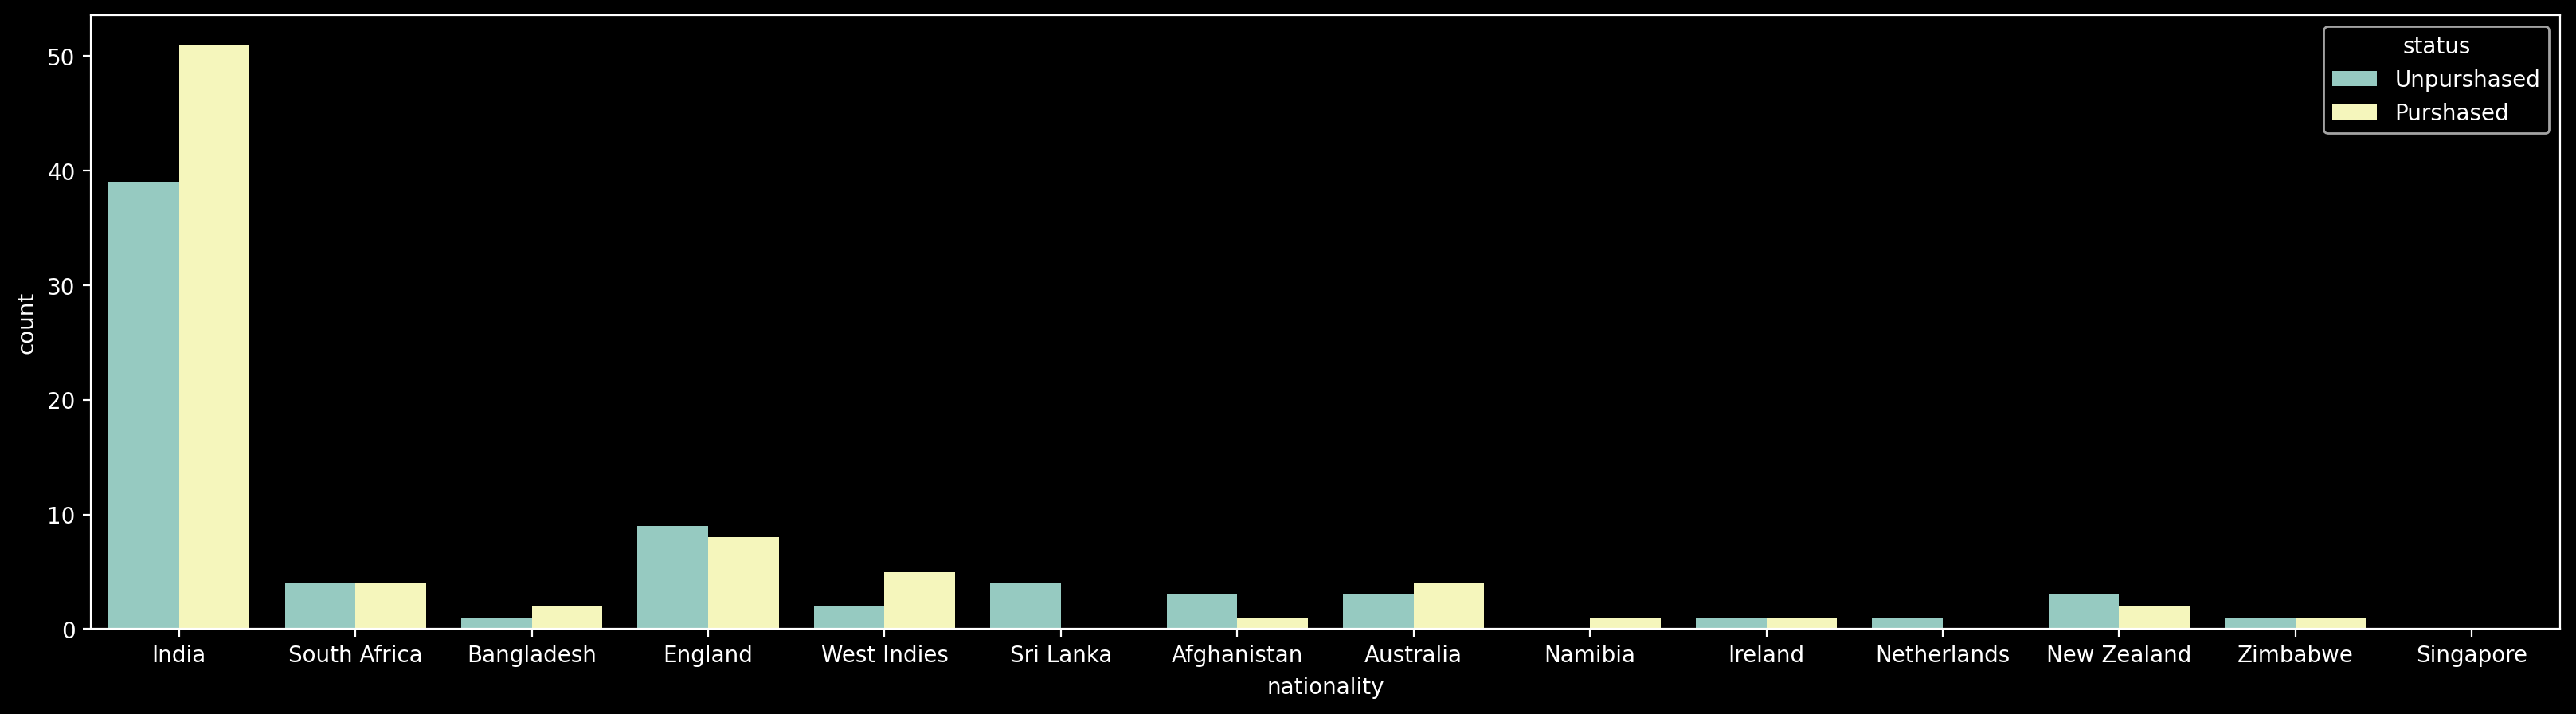

In [31]:
#Set the figure size:
plt.figure(figsize=(20,5))

sns.countplot(x="nationality", hue="status", data=df)

In [32]:
df["Sold at base price"] = (df["base price (in lacs)"] == df["final price (in lacs)"]).astype("int")

pd.crosstab(df["Sold at base price"], df["nationality"])

nationality,Afghanistan,Australia,Bangladesh,England,India,Ireland,Namibia,Netherlands,New Zealand,Singapore,South Africa,Sri Lanka,West Indies,Zimbabwe
Sold at base price,,,,,,,,,,,,,,
0,6,11,2,21,165,2,0,1,9,1,18,8,11,1
1,1,3,2,3,36,0,1,0,2,0,1,0,3,1


<Axes: xlabel='nationality', ylabel='count'>

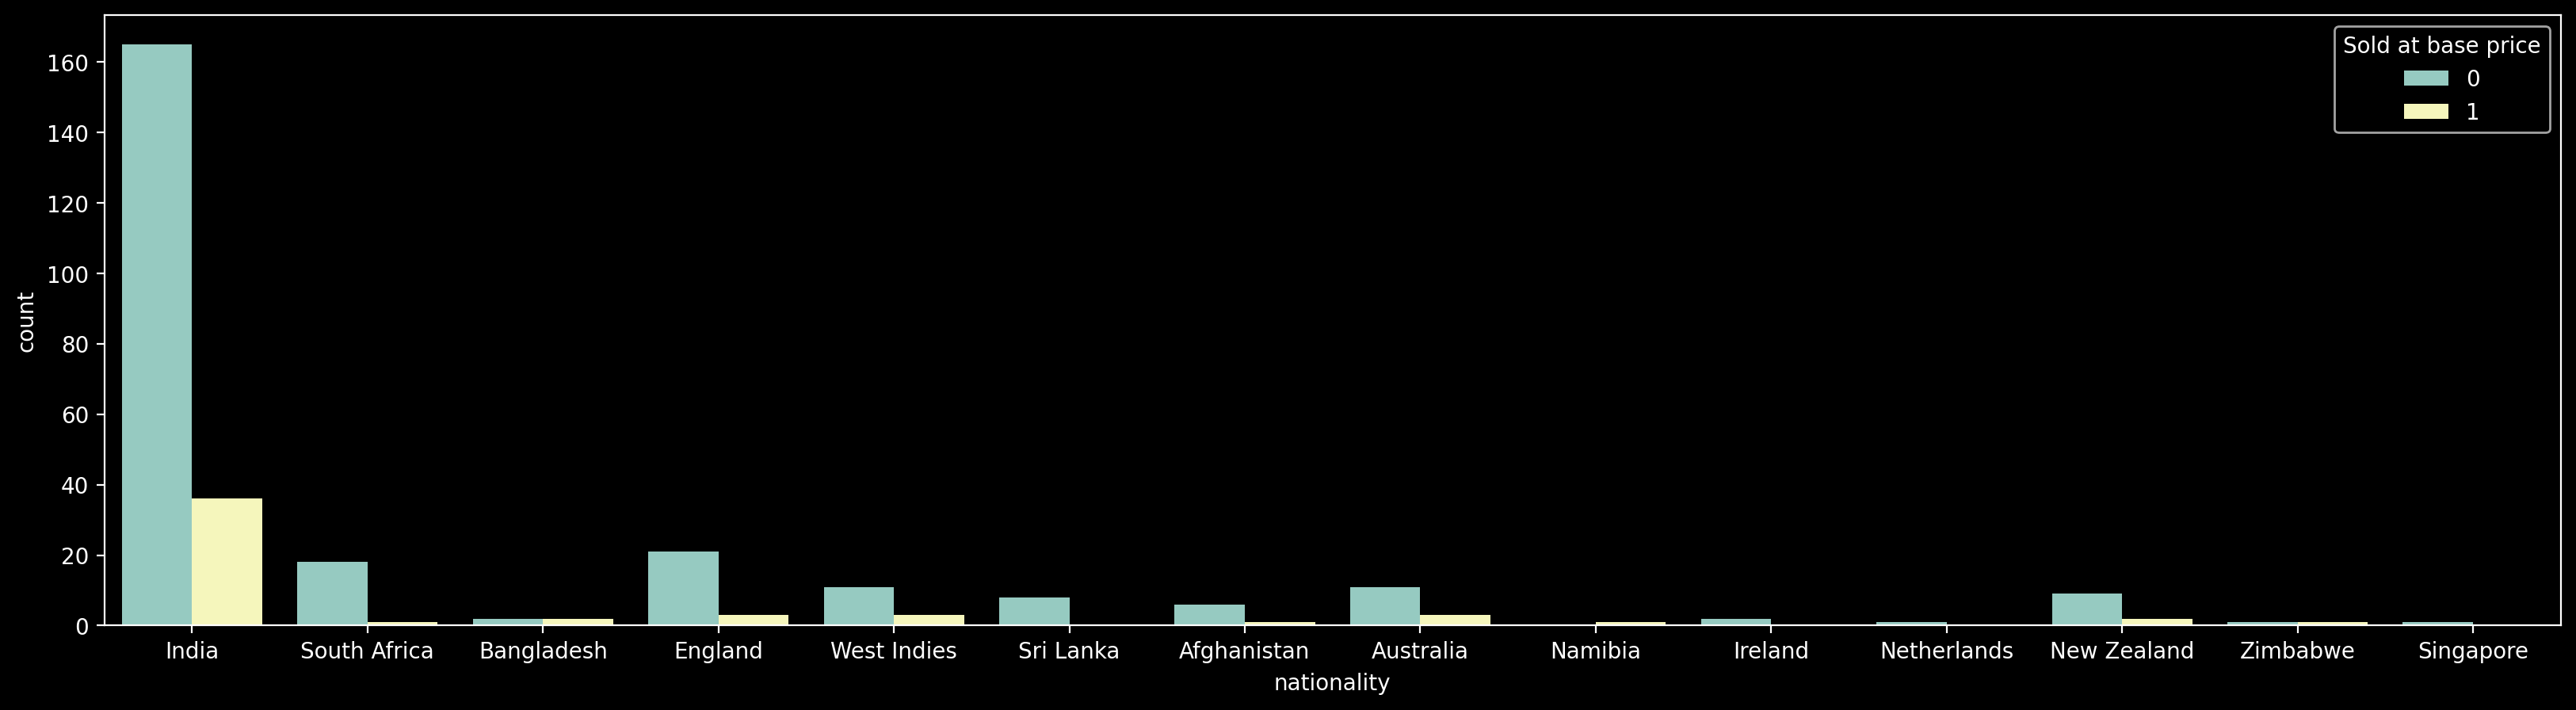

In [33]:
plt.figure(figsize=(20,5))
sns.countplot(x="nationality", hue="Sold at base price", data=df)